In [50]:
import pandas as pd
import re
import numpy as np

## Utils

In [51]:
num_colums = ['precio',
              'baños_familiares',
              'area_bruta',
              'numero_niveles',
              'parqueaderos',
              'alcobas_familiares',
              'estrato',
              'area_total',
              'juegos_infantiles',
              'balcon', 
              'zona_ropas', 
              'camaras_cctv', 
              'cancha_polideportiva',
              'ascensor', 
              'cancha_squash', 
              'zona_bbq', 
              'patio',
              'unidad_cerrada_conjunto', 
              'zonas_verdes', 
              'aire_acondicionado',
              'jacuzzi', 
              'red_de_Gas', 
              'turco', 
              'porteria_24_7', 
              'sauna',
              'calentador_de_agua', 
              'terraza', 
              'closet_de_linos', 
              'biblioteca',
              'parqueadero_visitantes', 
              'gimnasio', 
              'piscina', 
              'salon_social',
              'dispositivos_automatizacion', 
              'alarma']
cat_columns = ['zona', 
               'barrio_sector', 
               'tipo_pisos',
               'ciudad', 
               'tipo_cocina']

In [52]:
columns_to_format = ["precio","baños_familiares", "area_bruta", "parqueaderos", "alcobas_familiares", "area_total", *cat_columns]
columns_to_format

['precio',
 'baños_familiares',
 'area_bruta',
 'parqueaderos',
 'alcobas_familiares',
 'area_total',
 'zona',
 'barrio_sector',
 'tipo_pisos',
 'ciudad',
 'tipo_cocina']

In [53]:
def format_column(df, columns, cat_columns):
    for column in columns:
        if column not in cat_columns:
            if column == "precio":
                df[column] = df[column].apply(lambda x: x.replace("EN ARRIENDO $", "").replace(",",""))
            else:
                df[column] = df[column].apply(lambda x: re.findall('\d+', x)[0])
        else:
            if column == "zona":
                df[column] = df[column].apply(lambda x: x.lower().replace("apartamento en arriendo ", ""))
            df[column] = df[column].apply(lambda x: str(x).lower().strip())


## Carga y formato de datos

### Zona_1_Centro

In [54]:
data_scraping_zona_1 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_1.csv', encoding='utf-8')
data_scraping_zona_1 = data_scraping_zona_1.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_1.head()


,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306444 / Castilla,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Castilla Medellin,Castilla,Ceramica,1 + Baño de servicio,95 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,0,1,1,1,0,0,0,0,0,0
1,Código 1306376 / El Salvador,"EN ARRIENDO $950,000",Apartamento en Arriendo El Salvador Medellin,El Salvador,Ceramica,1,70 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
2,Código 1306287 / Los Angeles,"EN ARRIENDO $970,000",Apartamento en Arriendo Los Angeles Medellin,Los Angeles,Ceramica,1,38 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,1,0,0,0,0,0,0,0
3,Código 1306212 / Prado,"EN ARRIENDO $1,400,000",Apartamento en Arriendo Prado Medellin,Prado,Ceramica,1,50 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,1,0,1,1,1,0,0,0,0,0
4,Código 1306007 / 12 de Octubre,"EN ARRIENDO $800,000",Apartamento en Arriendo 12 de Octubre Medellin,12 de Octubre,Ceramica,1\r\n baño ...,92 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [55]:
df_zona_1 = data_scraping_zona_1.copy()
df_zona_1.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306444 / Castilla,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Castilla Medellin,Castilla,Ceramica,1 + Baño de servicio,95 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,0,1,1,1,0,0,0,0,0,0
1,Código 1306376 / El Salvador,"EN ARRIENDO $950,000",Apartamento en Arriendo El Salvador Medellin,El Salvador,Ceramica,1,70 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
2,Código 1306287 / Los Angeles,"EN ARRIENDO $970,000",Apartamento en Arriendo Los Angeles Medellin,Los Angeles,Ceramica,1,38 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,1,0,0,0,0,0,0,0
3,Código 1306212 / Prado,"EN ARRIENDO $1,400,000",Apartamento en Arriendo Prado Medellin,Prado,Ceramica,1,50 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,1,0,1,1,1,0,0,0,0,0
4,Código 1306007 / 12 de Octubre,"EN ARRIENDO $800,000",Apartamento en Arriendo 12 de Octubre Medellin,12 de Octubre,Ceramica,1\r\n baño ...,92 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [56]:
format_column(df_zona_1, columns_to_format, cat_columns)
df_zona_1.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306444 / Castilla,1100000,castilla medellin,castilla,ceramica,1,95,medellin zona 1 - centro,1,integral,...,0,1,1,1,0,0,0,0,0,0
1,Código 1306376 / El Salvador,950000,el salvador medellin,el salvador,ceramica,1,70,medellin zona 1 - centro,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
2,Código 1306287 / Los Angeles,970000,los angeles medellin,los angeles,ceramica,1,38,medellin zona 1 - centro,1,semi-integral,...,0,0,1,0,0,0,0,0,0,0
3,Código 1306212 / Prado,1400000,prado medellin,prado,ceramica,1,50,medellin zona 1 - centro,1,integral,...,1,0,1,1,1,0,0,0,0,0
4,Código 1306007 / 12 de Octubre,800000,12 de octubre medellin,12 de octubre,ceramica,1,92,medellin zona 1 - centro,1,integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [57]:
df_zona_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       214 non-null    object
 1   precio                       214 non-null    object
 2   zona                         214 non-null    object
 3   barrio_sector                214 non-null    object
 4   tipo_pisos                   214 non-null    object
 5   baños_familiares             214 non-null    object
 6   area_bruta                   214 non-null    object
 7   ciudad                       214 non-null    object
 8   numero_niveles               214 non-null    int64 
 9   tipo_cocina                  214 non-null    object
 10  parqueaderos                 214 non-null    object
 11  alcobas_familiares           214 non-null    object
 12  estrato                      214 non-null    int64 
 13  area_total                   214 no

In [58]:
# Formato a columnas numéricas
df_zona_1[num_colums] = df_zona_1[num_colums].astype('float')
df_zona_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       214 non-null    object 
 1   precio                       214 non-null    float64
 2   zona                         214 non-null    object 
 3   barrio_sector                214 non-null    object 
 4   tipo_pisos                   214 non-null    object 
 5   baños_familiares             214 non-null    float64
 6   area_bruta                   214 non-null    float64
 7   ciudad                       214 non-null    object 
 8   numero_niveles               214 non-null    float64
 9   tipo_cocina                  214 non-null    object 
 10  parqueaderos                 214 non-null    float64
 11  alcobas_familiares           214 non-null    float64
 12  estrato                      214 non-null    float64
 13  area_total          

In [59]:
df_zona_1.to_csv("zona_1_centro.csv", index=False)

### Zona_2_Poblado

In [60]:
data_scraping_zona_2 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_2.csv', encoding='utf-8')
data_scraping_zona_2 = data_scraping_zona_2.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_2.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306437 / Intercontinental,"EN ARRIENDO $4,000,000",Apartamento en Arriendo Intercontinental Medel...,Intercontinental,Porcelanato,2,90 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,0,1,1,1,0,1,0,0
1,Código 1306392 / Ciudad del Rio,"EN ARRIENDO $2,900,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramica,1,45 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,1,1,1,0,0
2,Código 1306388 / Ciudad del Rio,"EN ARRIENDO $3,650,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramicapiso de madera en la habitaciones,2,65 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,1,1,0,1,1,1,1,0,0
3,Código 1306377 / La Frontera,"EN ARRIENDO $3,300,000",Apartamento en Arriendo La Frontera Medellin,La Frontera,Ceramica,2\r\n La ha...,84 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,0,0,0,0,0
4,Código 1306375 / El Campestre,"EN ARRIENDO $7,950,000",Apartamento en Arriendo El Campestre Medellin,El Campestre,Porcelanato,5\r\n 3 cab...,240 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integralabierta con mesón en mármol,...,1,1,1,0,1,0,1,1,0,0


In [61]:
df_zona_2 = data_scraping_zona_2.copy()
df_zona_2.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306437 / Intercontinental,"EN ARRIENDO $4,000,000",Apartamento en Arriendo Intercontinental Medel...,Intercontinental,Porcelanato,2,90 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,0,1,1,1,0,1,0,0
1,Código 1306392 / Ciudad del Rio,"EN ARRIENDO $2,900,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramica,1,45 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,1,1,1,0,0
2,Código 1306388 / Ciudad del Rio,"EN ARRIENDO $3,650,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramicapiso de madera en la habitaciones,2,65 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,1,1,0,1,1,1,1,0,0
3,Código 1306377 / La Frontera,"EN ARRIENDO $3,300,000",Apartamento en Arriendo La Frontera Medellin,La Frontera,Ceramica,2\r\n La ha...,84 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,0,0,0,0,0
4,Código 1306375 / El Campestre,"EN ARRIENDO $7,950,000",Apartamento en Arriendo El Campestre Medellin,El Campestre,Porcelanato,5\r\n 3 cab...,240 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integralabierta con mesón en mármol,...,1,1,1,0,1,0,1,1,0,0


In [62]:
format_column(df_zona_2, columns_to_format, cat_columns)
df_zona_2.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306437 / Intercontinental,4000000,intercontinental medellin,intercontinental,porcelanato,2,90,medellin zona 2 - el poblado,1,integral,...,1,0,0,1,1,1,0,1,0,0
1,Código 1306392 / Ciudad del Rio,2900000,ciudad del rio medellin,ciudad del rio,ceramica,1,45,medellin zona 2 - el poblado,1,integral,...,1,0,1,0,1,1,1,1,0,0
2,Código 1306388 / Ciudad del Rio,3650000,ciudad del rio medellin,ciudad del rio,ceramicapiso de madera en la habitaciones,2,65,medellin zona 2 - el poblado,1,integral,...,1,1,1,0,1,1,1,1,0,0
3,Código 1306377 / La Frontera,3300000,la frontera medellin,la frontera,ceramica,2,84,medellin zona 2 - el poblado,1,integral,...,1,0,1,0,1,0,0,0,0,0
4,Código 1306375 / El Campestre,7950000,el campestre medellin,el campestre,porcelanato,5,240,medellin zona 2 - el poblado,1,integralabierta con mesón en mármol,...,1,1,1,0,1,0,1,1,0,0


In [63]:
# Formato a columnas numéricas
df_zona_2[num_colums] = df_zona_2[num_colums].astype('float')
df_zona_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       1499 non-null   object 
 1   precio                       1499 non-null   float64
 2   zona                         1499 non-null   object 
 3   barrio_sector                1499 non-null   object 
 4   tipo_pisos                   1499 non-null   object 
 5   baños_familiares             1499 non-null   float64
 6   area_bruta                   1499 non-null   float64
 7   ciudad                       1499 non-null   object 
 8   numero_niveles               1499 non-null   float64
 9   tipo_cocina                  1499 non-null   object 
 10  parqueaderos                 1499 non-null   float64
 11  alcobas_familiares           1499 non-null   float64
 12  estrato                      1499 non-null   float64
 13  area_total        

In [64]:
df_zona_2.to_csv("zona_2_poblado.csv", index=False)

### Zona_3_Laureles

In [65]:
data_scraping_zona_3 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_3.csv', encoding='utf-8')
data_scraping_zona_3 = data_scraping_zona_3.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_3.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306374 / Laureles,"EN ARRIENDO $2,250,000",Apartamento en Arriendo Laureles Medellin,Laureles,Retal de marmol,2 + Baño de servicio,85 M2. aproximadamente,Medellin Zona 3 - Laureles,3,Integral,...,1,0,1,0,0,0,0,0,0,0
1,Código 1306307 / La Castellana,"EN ARRIENDO $1,300,000",Apartamento en Arriendo La Castellana Medellin,La Castellana,Ceramica,2,70 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306291 / Robledo,"EN ARRIENDO $1,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,1,45 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306288 / Robledo,"EN ARRIENDO $3,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,2\r\n Cabin...,85 M2. aproximadamente,Medellin Zona 3 - Laureles,1,IntegralCon red de gas,...,1,0,0,0,0,0,0,0,0,0
4,Código 1306264 / Simón Bolivar,"EN ARRIENDO $6,500,000",Apartamento en Arriendo Simón Bolivar Medellin,Simón Bolivar,Ceramica,2 + Baño de servicio,220 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [66]:
df_zona_3 = data_scraping_zona_3.copy()
df_zona_3.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306374 / Laureles,"EN ARRIENDO $2,250,000",Apartamento en Arriendo Laureles Medellin,Laureles,Retal de marmol,2 + Baño de servicio,85 M2. aproximadamente,Medellin Zona 3 - Laureles,3,Integral,...,1,0,1,0,0,0,0,0,0,0
1,Código 1306307 / La Castellana,"EN ARRIENDO $1,300,000",Apartamento en Arriendo La Castellana Medellin,La Castellana,Ceramica,2,70 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306291 / Robledo,"EN ARRIENDO $1,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,1,45 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306288 / Robledo,"EN ARRIENDO $3,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,2\r\n Cabin...,85 M2. aproximadamente,Medellin Zona 3 - Laureles,1,IntegralCon red de gas,...,1,0,0,0,0,0,0,0,0,0
4,Código 1306264 / Simón Bolivar,"EN ARRIENDO $6,500,000",Apartamento en Arriendo Simón Bolivar Medellin,Simón Bolivar,Ceramica,2 + Baño de servicio,220 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [67]:
format_column(df_zona_3, columns_to_format, cat_columns)
df_zona_3.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306374 / Laureles,2250000,laureles medellin,laureles,retal de marmol,2,85,medellin zona 3 - laureles,3,integral,...,1,0,1,0,0,0,0,0,0,0
1,Código 1306307 / La Castellana,1300000,la castellana medellin,la castellana,ceramica,2,70,medellin zona 3 - laureles,1,integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306291 / Robledo,1000000,robledo medellin,robledo,ceramica,1,45,medellin zona 3 - laureles,1,integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306288 / Robledo,3000000,robledo medellin,robledo,ceramica,2,85,medellin zona 3 - laureles,1,integralcon red de gas,...,1,0,0,0,0,0,0,0,0,0
4,Código 1306264 / Simón Bolivar,6500000,simón bolivar medellin,simón bolivar,ceramica,2,220,medellin zona 3 - laureles,1,integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [68]:
# Formato a columnas numéricas
df_zona_3[num_colums] = df_zona_3[num_colums].astype('float')
df_zona_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       1143 non-null   object 
 1   precio                       1143 non-null   float64
 2   zona                         1143 non-null   object 
 3   barrio_sector                1143 non-null   object 
 4   tipo_pisos                   1143 non-null   object 
 5   baños_familiares             1143 non-null   float64
 6   area_bruta                   1143 non-null   float64
 7   ciudad                       1143 non-null   object 
 8   numero_niveles               1143 non-null   float64
 9   tipo_cocina                  1143 non-null   object 
 10  parqueaderos                 1143 non-null   float64
 11  alcobas_familiares           1143 non-null   float64
 12  estrato                      1143 non-null   float64
 13  area_total        

In [69]:
df_zona_3.to_csv("zona_3_laureles.csv", index=False)

### Zona 4 Belén

In [70]:
data_scraping_zona_4 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_4.csv', encoding='utf-8')
data_scraping_zona_4 = data_scraping_zona_4.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_4.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306431 / Loma de los Bernal,"EN ARRIENDO $2,400,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,2,70 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,0,0,1,1,0,0,0
1,Código 1306378 / Rosales,"EN ARRIENDO $2,300,000",Apartamento en Arriendo Rosales Medellin,Rosales,Ceramica,2,90 M2. aproximadamente,Medellin Zona 4 - Belen,2,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306362 / Belen Parque,"EN ARRIENDO $1,600,000",Apartamento en Arriendo Belen Parque Medellin,Belen Parque,Ceramica,2,60 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306356 / La Mota,"EN ARRIENDO $2,300,000",Apartamento en Arriendo La Mota Medellin,La Mota,Ceramica,2,80 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,0,0,1,0,1,0,0,0
4,Código 1306340 / Loma de los Bernal,"EN ARRIENDO $1,500,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,1,58 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,1,1,1,0,1,0,0


In [71]:
df_zona_4 = data_scraping_zona_4.copy()
df_zona_4.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306431 / Loma de los Bernal,"EN ARRIENDO $2,400,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,2,70 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,0,0,1,1,0,0,0
1,Código 1306378 / Rosales,"EN ARRIENDO $2,300,000",Apartamento en Arriendo Rosales Medellin,Rosales,Ceramica,2,90 M2. aproximadamente,Medellin Zona 4 - Belen,2,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306362 / Belen Parque,"EN ARRIENDO $1,600,000",Apartamento en Arriendo Belen Parque Medellin,Belen Parque,Ceramica,2,60 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306356 / La Mota,"EN ARRIENDO $2,300,000",Apartamento en Arriendo La Mota Medellin,La Mota,Ceramica,2,80 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,0,0,1,0,1,0,0,0
4,Código 1306340 / Loma de los Bernal,"EN ARRIENDO $1,500,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,1,58 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,1,1,1,0,1,0,0


In [72]:
format_column(df_zona_4, columns_to_format, cat_columns)
df_zona_4.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306431 / Loma de los Bernal,2400000,loma de los bernal medellin,loma de los bernal,ceramica,2,70,medellin zona 4 - belen,1,integral,...,1,0,1,0,0,1,1,0,0,0
1,Código 1306378 / Rosales,2300000,rosales medellin,rosales,ceramica,2,90,medellin zona 4 - belen,2,integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306362 / Belen Parque,1600000,belen parque medellin,belen parque,ceramica,2,60,medellin zona 4 - belen,1,integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306356 / La Mota,2300000,la mota medellin,la mota,ceramica,2,80,medellin zona 4 - belen,1,integral,...,1,0,0,0,1,0,1,0,0,0
4,Código 1306340 / Loma de los Bernal,1500000,loma de los bernal medellin,loma de los bernal,ceramica,1,58,medellin zona 4 - belen,1,integral,...,1,0,1,1,1,1,0,1,0,0


In [73]:
# Formato a columnas numéricas
df_zona_4[num_colums] = df_zona_4[num_colums].astype('float')
df_zona_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       294 non-null    object 
 1   precio                       294 non-null    float64
 2   zona                         294 non-null    object 
 3   barrio_sector                294 non-null    object 
 4   tipo_pisos                   294 non-null    object 
 5   baños_familiares             294 non-null    float64
 6   area_bruta                   294 non-null    float64
 7   ciudad                       294 non-null    object 
 8   numero_niveles               294 non-null    float64
 9   tipo_cocina                  294 non-null    object 
 10  parqueaderos                 294 non-null    float64
 11  alcobas_familiares           294 non-null    float64
 12  estrato                      294 non-null    float64
 13  area_total          

In [74]:
df_zona_4.to_csv("zona_4_Belen.csv", index=False)

### Zona 5 Prado

In [75]:
data_scraping_zona_5 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_5.csv', encoding='utf-8')
data_scraping_zona_5 = data_scraping_zona_5.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_5.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1305921 / Barichara,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Barichara San Antonio ...,Barichara,Ceramica,1,33 M2. aproximadamente,San Antonio de Prado,1,Integral,...,0,0,0,0,1,0,0,0,0,0
1,Código 1305587 / San Antonio de Prado,"EN ARRIENDO $800,000",Apartamento en Arriendo San Antonio de Prado S...,San Antonio de Prado,Ceramica,2,65 M2. aproximadamente,San Antonio de Prado,1,Integral,...,1,0,0,0,1,0,1,1,0,0
2,Código 1305411 / Aragon,"EN ARRIENDO $950,000",Apartamento en Arriendo Aragon San Antonio de ...,Aragon,Ceramica,2,58 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1305175 / BARICHARA,"EN ARRIENDO $1,000,000",Apartamento en Arriendo BARICHARA San Antonio...,BARICHARA,Ceramica,1,40 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
4,Código 1305082 / barichara,"EN ARRIENDO $900,000",Apartamento en Arriendo barichara San Antonio ...,barichara,Ceramica,1,50 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,1,0,1,0,0


In [76]:
df_zona_5 = data_scraping_zona_5.copy()
df_zona_5.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1305921 / Barichara,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Barichara San Antonio ...,Barichara,Ceramica,1,33 M2. aproximadamente,San Antonio de Prado,1,Integral,...,0,0,0,0,1,0,0,0,0,0
1,Código 1305587 / San Antonio de Prado,"EN ARRIENDO $800,000",Apartamento en Arriendo San Antonio de Prado S...,San Antonio de Prado,Ceramica,2,65 M2. aproximadamente,San Antonio de Prado,1,Integral,...,1,0,0,0,1,0,1,1,0,0
2,Código 1305411 / Aragon,"EN ARRIENDO $950,000",Apartamento en Arriendo Aragon San Antonio de ...,Aragon,Ceramica,2,58 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1305175 / BARICHARA,"EN ARRIENDO $1,000,000",Apartamento en Arriendo BARICHARA San Antonio...,BARICHARA,Ceramica,1,40 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
4,Código 1305082 / barichara,"EN ARRIENDO $900,000",Apartamento en Arriendo barichara San Antonio ...,barichara,Ceramica,1,50 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,1,0,1,0,0


In [77]:
format_column(df_zona_5, columns_to_format, cat_columns)
df_zona_5.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1305921 / Barichara,1100000,barichara san antonio de prado,barichara,ceramica,1,33,san antonio de prado,1,integral,...,0,0,0,0,1,0,0,0,0,0
1,Código 1305587 / San Antonio de Prado,800000,san antonio de prado san antonio de prado,san antonio de prado,ceramica,2,65,san antonio de prado,1,integral,...,1,0,0,0,1,0,1,1,0,0
2,Código 1305411 / Aragon,950000,aragon san antonio de prado,aragon,ceramica,2,58,san antonio de prado,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1305175 / BARICHARA,1000000,barichara san antonio de prado,barichara,ceramica,1,40,san antonio de prado,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
4,Código 1305082 / barichara,900000,barichara san antonio de prado,barichara,ceramica,1,50,san antonio de prado,1,semi-integral,...,0,0,0,0,0,1,0,1,0,0


In [78]:
# Formato a columnas numéricas
df_zona_5[num_colums] = df_zona_5[num_colums].astype('float')
df_zona_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       82 non-null     object 
 1   precio                       82 non-null     float64
 2   zona                         82 non-null     object 
 3   barrio_sector                82 non-null     object 
 4   tipo_pisos                   82 non-null     object 
 5   baños_familiares             82 non-null     float64
 6   area_bruta                   82 non-null     float64
 7   ciudad                       82 non-null     object 
 8   numero_niveles               82 non-null     float64
 9   tipo_cocina                  82 non-null     object 
 10  parqueaderos                 82 non-null     float64
 11  alcobas_familiares           82 non-null     float64
 12  estrato                      82 non-null     float64
 13  area_total            

In [79]:
df_zona_5.to_csv("zona_5_Prado.csv", index=False)

## Datos concatenados

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df_zona_1 = pd.read_csv("zona_1_centro.csv")
df_zona_2 = pd.read_csv("zona_2_poblado.csv")
df_zona_3 = pd.read_csv("zona_3_laureles.csv")
df_zona_4 = pd.read_csv("zona_4_Belen.csv")
df_zona_5 = pd.read_csv("zona_5_Prado.csv")

In [82]:
print(df_zona_1.shape)
print(df_zona_2.shape)
print(df_zona_3.shape)
print(df_zona_4.shape)
print(df_zona_5.shape)

(214, 41)
(1499, 41)
(1143, 41)
(294, 41)
(82, 41)


In [89]:
print(df_zona_2.groupby('zona').size())

zona
aguacatala medellin                        14
alejandria el poblado                       1
alejandria medellin                        31
alejandria medellin zona 2 - el poblado     2
amoblado el poblado oviedo                  1
                                           ..
transv. superior el poblado                 2
transv. superior medellin                  12
vizcaya el poblado                          1
vizcaya medellin                            9
vizcaya medellin zona 2 - el poblado        1
Length: 187, dtype: int64


In [83]:
dict_zonas = {
    "zonas" : ["centro", "poblado", "laureles", "belén", "San Antonio de Prado"],
    "cant_inmuebles" : [214, 1499, 1143, 294, 82]
}

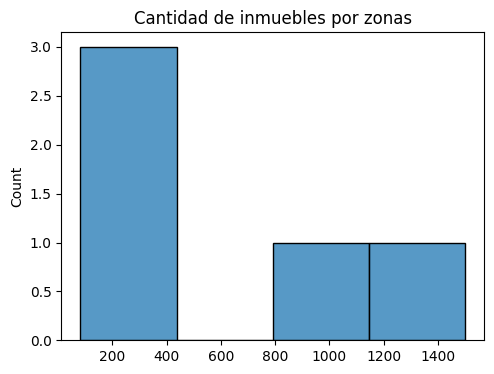

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Cantidad de inmuebles por zonas')
sns.histplot(x=dict_zonas["cant_inmuebles"], y)
plt.show()

In [33]:
complete_data = pd.concat([df_zona_1, df_zona_2,df_zona_3,df_zona_4,df_zona_5],axis=0).reset_index()
complete_data.shape

(3232, 42)

In [45]:
complete_data.head()

,index,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,0,Código 1306444 / Castilla,1100000.0,castilla medellin,castilla,ceramica,1.0,95.0,medellin zona 1 - centro,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Código 1306376 / El Salvador,950000.0,el salvador medellin,el salvador,ceramica,1.0,70.0,medellin zona 1 - centro,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Código 1306287 / Los Angeles,970000.0,los angeles medellin,los angeles,ceramica,1.0,38.0,medellin zona 1 - centro,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Código 1306212 / Prado,1400000.0,prado medellin,prado,ceramica,1.0,50.0,medellin zona 1 - centro,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,Código 1306007 / 12 de Octubre,800000.0,12 de octubre medellin,12 de octubre,ceramica,1.0,92.0,medellin zona 1 - centro,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
complete_data.columns

Index(['index', 'codigo', 'precio', 'zona', 'barrio_sector', 'tipo_pisos',
       'baños_familiares', 'area_bruta', 'ciudad', 'numero_niveles',
       'tipo_cocina', 'parqueaderos', 'alcobas_familiares', 'estrato',
       'area_total', 'juegos_infantiles', 'balcon', 'zona_ropas',
       'camaras_cctv', 'cancha_polideportiva', 'ascensor', 'cancha_squash',
       'zona_bbq', 'patio', 'unidad_cerrada_conjunto', 'zonas_verdes',
       'aire_acondicionado', 'jacuzzi', 'red_de_Gas', 'turco', 'porteria_24_7',
       'sauna', 'calentador_de_agua', 'terraza', 'closet_de_linos',
       'biblioteca', 'parqueadero_visitantes', 'gimnasio', 'piscina',
       'salon_social', 'dispositivos_automatizacion', 'alarma'],
      dtype='object')

# Data iteración 1

## Lectura de datos

In [35]:
data_iteration_1 = complete_data.drop(columns=['codigo','zona','barrio_sector','ciudad'])
data_iteration_1.columns

Index(['index', 'precio', 'tipo_pisos', 'baños_familiares', 'area_bruta',
       'numero_niveles', 'tipo_cocina', 'parqueaderos', 'alcobas_familiares',
       'estrato', 'area_total', 'juegos_infantiles', 'balcon', 'zona_ropas',
       'camaras_cctv', 'cancha_polideportiva', 'ascensor', 'cancha_squash',
       'zona_bbq', 'patio', 'unidad_cerrada_conjunto', 'zonas_verdes',
       'aire_acondicionado', 'jacuzzi', 'red_de_Gas', 'turco', 'porteria_24_7',
       'sauna', 'calentador_de_agua', 'terraza', 'closet_de_linos',
       'biblioteca', 'parqueadero_visitantes', 'gimnasio', 'piscina',
       'salon_social', 'dispositivos_automatizacion', 'alarma'],
      dtype='object')

In [36]:
data_iteration_1.head()

,index,precio,tipo_pisos,baños_familiares,area_bruta,numero_niveles,tipo_cocina,parqueaderos,alcobas_familiares,estrato,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,0,1100000.0,ceramica,1.0,95.0,1.0,integral,0.0,3.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,950000.0,ceramica,1.0,70.0,1.0,semi-integral,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,970000.0,ceramica,1.0,38.0,1.0,semi-integral,0.0,1.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1400000.0,ceramica,1.0,50.0,1.0,integral,1.0,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,800000.0,ceramica,1.0,92.0,1.0,integralcon alacenas,0.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
data_mixed = data_iteration_1.copy()


In [38]:
data_iteration_1.shape

(3232, 38)

In [39]:
data_iteration_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        3232 non-null   int64  
 1   precio                       3232 non-null   float64
 2   tipo_pisos                   3232 non-null   object 
 3   baños_familiares             3232 non-null   float64
 4   area_bruta                   3232 non-null   float64
 5   numero_niveles               3232 non-null   float64
 6   tipo_cocina                  3228 non-null   object 
 7   parqueaderos                 3232 non-null   float64
 8   alcobas_familiares           3232 non-null   float64
 9   estrato                      3232 non-null   float64
 10  area_total                   3232 non-null   float64
 11  juegos_infantiles            3232 non-null   float64
 12  balcon                       3232 non-null   float64
 13  zona_ropas        

## Formateo de datos

In [40]:
pd.set_option('display.max_rows', 50)

In [41]:
data_iteration_1['tipo_pisos'].unique()

array(['ceramica', 'baldosa comun', 'granito',
       'porcelanatobaldosa de gres en la terraza', 'ceramicay baldosa',
       'retal de marmol', 'otros', 'porcelanato', 'madera laminada',
       'ceramicapiso de madera en la habitaciones', 'marmol',
       'cerámica y madera laminada', 'ceramicamadera',
       'madera retal de marmol',
       'ceramica y maderamadera en las habitaciones', 'madera',
       'ceramica- madrera laminada', 'madera laminada y ceramica',
       'maderaporcelanato', 'mármol y madera laminada',
       'ceramicamadera laminada', 'marmol y maderahabitaciones en madera',
       'porcelanatoen habitaciones.', 'marmolmarmol y ceramica',
       'porcelanatoen la zona social y madera laminada en las alcobas',
       'porcelanato y madera laminadahabitaciones en madera laminada',
       'marmolalcobas en madera laminada', 'maderay ceramica',
       'ceramicay madera laminada en las habitaciones.',
       'madera laminaday ceramica',
       'porcelanatoen la zona social

In [42]:
data_iteration_1['tipo_cocina'].unique()

array(['integral', 'semi-integral', 'integralcon alacenas',
       'integralalacenas', 'sencilla', 'semi-integralcon red de gas',
       'sencillacon gabinetes', 'sencillared de gas',
       'integralcon red de gas', 'integralgas natural',
       'integralred de gas', 'sencillagas propano', 'no aplica',
       'sencillasin red de gas', nan, 'integralred gas',
       'integralabierta con mesón en mármol', 'integralabierta',
       'integralcon barra',
       'integralcocina integral independiente con  campana extractora',
       'integralcocina integral con barra americana que se integra con la zona social del inmueble.  horno, campana extractora & acabados en madera.',
       'integralcocina en isla y barra americana que conecta al área social del apartamento',
       'integralabierta con meson en quarztone',
       'integralincluye lavaplatos y horno',
       'integralabierta con meson en quartzone',
       'semi-integralabierta con meson en acero inoxidable',
       'integralen marmo

In [43]:
df_concina = pd.read_csv('tipo_cocina.csv', sep=';')
dict_cocina = {}
for cocina in df_concina.itertuples():
    dict_cocina[cocina.original] = cocina.format

data_iteration_1['tipo_cocina'] = data_iteration_1['tipo_cocina'].apply(lambda x: dict_cocina[x])

FileNotFoundError: [Errno 2] No such file or directory: 'tipo_cocina.csv'

In [ ]:
data_iteration_1['tipo_cocina'].unique()

array(['integral', 'semiintegral', 'sencilla', 'otro', 'integralabierta',
       'mixta'], dtype=object)

In [ ]:
data_iteration_1.groupby('tipo_cocina').size()

tipo_cocina
integral           2786
integralabierta      25
mixta                25
otro                  8
semiintegral        263
sencilla            125
dtype: int64

In [ ]:
data_iteration_1['tipo_pisos'] = data_iteration_1['tipo_pisos'].apply(lambda x: x.replace('\n',''))

In [ ]:
#marmol\npiso en  madera y gran parte del inmueble entapetado.,marmolmadera

df_pisos = pd.read_csv('tipo_pisos.csv', sep=';')
dict_pisos = {}
for piso in df_pisos.itertuples():
    dict_pisos[piso.original] = piso.format

data_iteration_1['tipo_pisos'] = data_iteration_1['tipo_pisos'].apply(lambda x: dict_pisos[x])

In [ ]:
data_iteration_1['tipo_pisos'].unique()

array(['ceramica', 'baldosa', 'granito', 'otro', 'marmol', 'porcelanato',
       'madera', 'ceramicamadera ', 'ceramicamadera', 'madera ',
       'porcelanamadera', 'marmolmadera', 'marmolceramica',
       'porcelanatomadera', 'ceramicaporcelanato', nan, 'tapetemadera',
       'ceramicagranito', 'ceramicabaldosa'], dtype=object)

In [ ]:
data_iteration_1.groupby('tipo_pisos').size()

tipo_pisos
baldosa                 122
ceramica               1922
ceramicabaldosa           1
ceramicagranito           1
ceramicamadera           39
ceramicamadera            5
ceramicaporcelanato       2
granito                   2
madera                  313
madera                    1
marmol                  183
marmolceramica            5
marmolmadera             27
otro                     29
porcelanamadera           4
porcelanato             537
porcelanatomadera        27
tapetemadera              1
dtype: int64

In [ ]:
data_iteration_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        3232 non-null   int64  
 1   precio                       3232 non-null   float64
 2   tipo_pisos                   3221 non-null   object 
 3   baños_familiares             3232 non-null   float64
 4   area_bruta                   3232 non-null   float64
 5   numero_niveles               3232 non-null   float64
 6   tipo_cocina                  3232 non-null   object 
 7   parqueaderos                 3232 non-null   float64
 8   alcobas_familiares           3232 non-null   float64
 9   estrato                      3232 non-null   float64
 10  area_total                   3232 non-null   float64
 11  juegos_infantiles            3232 non-null   float64
 12  balcon                       3232 non-null   float64
 13  zona_ropas        

In [ ]:
data_iteration_1['tipo_pisos'].isna().sum()

11

In [ ]:
data_iteration_1 = data_iteration_1.dropna()

In [ ]:
data_iteration_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 3231
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        3221 non-null   int64  
 1   precio                       3221 non-null   float64
 2   tipo_pisos                   3221 non-null   object 
 3   baños_familiares             3221 non-null   float64
 4   area_bruta                   3221 non-null   float64
 5   numero_niveles               3221 non-null   float64
 6   tipo_cocina                  3221 non-null   object 
 7   parqueaderos                 3221 non-null   float64
 8   alcobas_familiares           3221 non-null   float64
 9   estrato                      3221 non-null   float64
 10  area_total                   3221 non-null   float64
 11  juegos_infantiles            3221 non-null   float64
 12  balcon                       3221 non-null   float64
 13  zona_ropas        

## Tratamiento de datos categóricos

In [ ]:
data_iteration_1['tipo_cocina'] = data_iteration_1['tipo_cocina'].astype('category')
data_iteration_1['tipo_pisos'] = data_iteration_1['tipo_pisos'].astype('category')

In [ ]:
data_iteration_1.head()

In [ ]:
import category_encoders as ce

In [ ]:
# Count Encoding - fit on training data, transform test data
encoder = ce.CountEncoder(normalize=True)
data_iteration_1["tipo_cocina_freq"] = encoder.fit_transform(data_iteration_1["tipo_cocina"])
data_iteration_1["tipo_pisos_freq"] = encoder.fit_transform(data_iteration_1["tipo_pisos"])

# Frequency (normalized count) Encoding
# encoder = ce.CountEncoder(cols="type", normalize=True)
# data_train["type_frequency_encoded"] = encoder.fit_transform(data_train["type"])
# data_test["type_frequency_encoded"] = encoder.transform(data_test["type"])

In [ ]:
data_iteration_1.groupby('tipo_cocina').size()

tipo_cocina
integral           2775
integralabierta      25
mixta                25
otro                  8
semiintegral        263
sencilla            125
dtype: int64

In [ ]:
data_iteration_1.groupby('tipo_cocina_freq').size()

tipo_cocina_freq
0.002484       8
0.007762      50
0.038808     125
0.081652     263
0.861534    2775
dtype: int64

In [ ]:
data_iteration_1.groupby('tipo_pisos').size()

tipo_pisos
baldosa                 122
ceramica               1922
ceramicabaldosa           1
ceramicagranito           1
ceramicamadera           39
ceramicamadera            5
ceramicaporcelanato       2
granito                   2
madera                  313
madera                    1
marmol                  183
marmolceramica            5
marmolmadera             27
otro                     29
porcelanamadera           4
porcelanato             537
porcelanatomadera        27
tapetemadera              1
dtype: int64

In [ ]:
data_iteration_1.groupby('tipo_pisos_freq').size()

tipo_pisos_freq
0.000310       4
0.000621       4
0.001242       4
0.001552      10
0.008382      54
0.009003      29
0.012108      39
0.037876     122
0.056815     183
0.097175     313
0.166718     537
0.596709    1922
dtype: int64

## Data Iteration 1

In [ ]:
data_iteration_1.columns

Index(['index', 'precio', 'tipo_pisos', 'baños_familiares', 'area_bruta',
       'numero_niveles', 'tipo_cocina', 'parqueaderos', 'alcobas_familiares',
       'estrato', 'area_total', 'juegos_infantiles', 'balcon', 'zona_ropas',
       'camaras_cctv', 'cancha_polideportiva', 'ascensor', 'cancha_squash',
       'zona_bbq', 'patio', 'unidad_cerrada_conjunto', 'zonas_verdes',
       'aire_acondicionado', 'jacuzzi', 'red_de_Gas', 'turco', 'porteria_24_7',
       'sauna', 'calentador_de_agua', 'terraza', 'closet_de_linos',
       'biblioteca', 'parqueadero_visitantes', 'gimnasio', 'piscina',
       'salon_social', 'dispositivos_automatizacion', 'alarma',
       'tipo_cocina_freq', 'tipo_pisos_freq'],
      dtype='object')

In [ ]:
columns = ['index', 'precio', 'baños_familiares', 'area_bruta',
       'numero_niveles','parqueaderos', 'alcobas_familiares',
       'estrato', 'area_total', 'juegos_infantiles', 'balcon', 'zona_ropas',
       'camaras_cctv', 'cancha_polideportiva', 'ascensor', 'cancha_squash',
       'zona_bbq', 'patio', 'unidad_cerrada_conjunto', 'zonas_verdes',
       'aire_acondicionado', 'jacuzzi', 'red_de_Gas', 'turco', 'porteria_24_7',
       'sauna', 'calentador_de_agua', 'terraza', 'closet_de_linos',
       'biblioteca', 'parqueadero_visitantes', 'gimnasio', 'piscina',
       'salon_social', 'dispositivos_automatizacion', 'alarma',
       'tipo_cocina_freq', 'tipo_pisos_freq']

data_iteration_1 = data_iteration_1[columns]
data_iteration_1.to_csv("data_iteration_1.csv")